In [1]:
from shapely.geometry import Point # Use in geospatial environment
import pandas as pd
import geopandas as gpd # Use in geospatial environment
import matplotlib.pyplot as plt
import folium #Use in geospatial environment
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37203,33,NASHVILLE,93532.890729543782,120334624.37817383,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
4,37246,57,NASHVILLE,2247.4521491892065,315078.17651367187,"MULTIPOLYGON (((-86.79052 36.15846, -86.79107 ..."


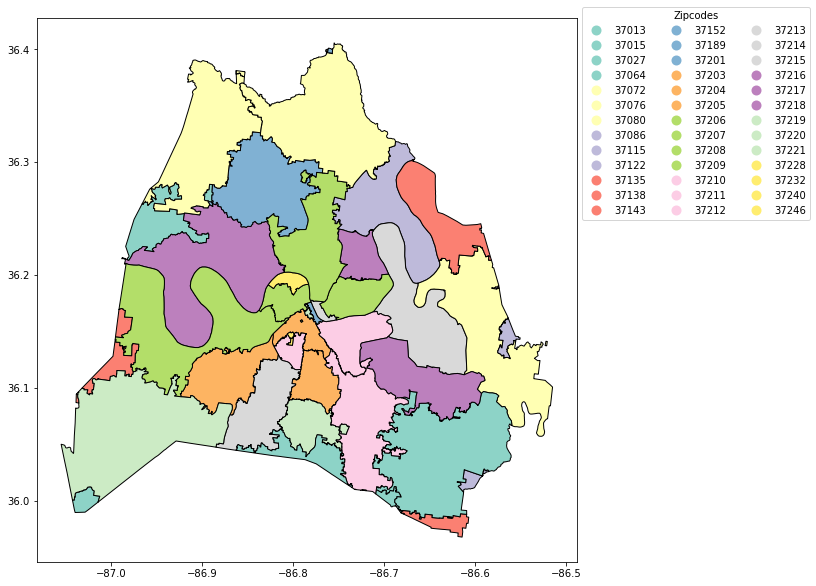

In [3]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [4]:
may_trips_pkl = pd.read_pickle('../data/may_trips.pkl')
print(may_trips_pkl.shape)
may_trips_pkl.head()

(224969, 10)


,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude
0,2019-05-01 00:00:55.423,BRD2134,"[[36.157235,-86.803612],[36.157235,-86.80362],...",Powered9EAJL,3.0000,958.00528,36.15710,36.15660,-86.80360,-86.80670
1,2019-05-01 00:03:33.147,LFT5,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",Powered296631,1.7156,1371.39112,36.15797,36.16054,-86.77896,-86.77689
2,2019-05-01 00:05:55.570,BRD2168,"[[36.155068,-86.782124],[36.156597,-86.78675]]",Powered7S2UU,3.0000,2296.58800,36.15470,36.15650,-86.78180,-86.78680
3,2019-05-01 00:05:55.570,BRD2166,"[[36.149741,-86.779344],[36.149741,-86.779327]...",PoweredZIIVX,3.0000,1200.78744,36.14940,36.15310,-86.77950,-86.77960
4,2019-05-01 00:05:55.570,BRD2165,"[[36.177699,-86.786477],[36.177711,-86.786469]...",PoweredJ7MB3,2.0000,351.04988,36.17780,36.17740,-86.78660,-86.78760


In [5]:
may_trips_pkl['geometry'] = may_trips_pkl.apply(lambda x: Point((x.startLongitude, x.startLatitude)), 
                                        axis=1)
may_trips_pkl.head(3)

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude,geometry
0,2019-05-01 00:00:55.423,BRD2134,"[[36.157235,-86.803612],[36.157235,-86.80362],...",Powered9EAJL,3.0000,958.00528,36.15710,36.15660,-86.80360,-86.80670,POINT (-86.8036 36.1571)
1,2019-05-01 00:03:33.147,LFT5,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",Powered296631,1.7156,1371.39112,36.15797,36.16054,-86.77896,-86.77689,POINT (-86.77896 36.15797)
2,2019-05-01 00:05:55.570,BRD2168,"[[36.155068,-86.782124],[36.156597,-86.78675]]",Powered7S2UU,3.0000,2296.58800,36.15470,36.15650,-86.78180,-86.78680,POINT (-86.7818 36.1547)


In [6]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
may_scooter_geo = gpd.GeoDataFrame(may_trips_pkl, 
                           crs = zipcodes.crs, 
                           geometry = may_trips_pkl['geometry'])

In [8]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [9]:
stops_by_zip = gpd.sjoin(may_scooter_geo, zipcodes, op = 'within')

In [10]:
stops_in_37206 = stops_by_zip.loc[stops_by_zip['zip'] == '37206']
stops_in_37206.shape

(8866, 14)

In [13]:
polygon37206 = zipcodes.loc[zipcodes['zip'] == '37206']
polygon37206.shape

(1, 3)

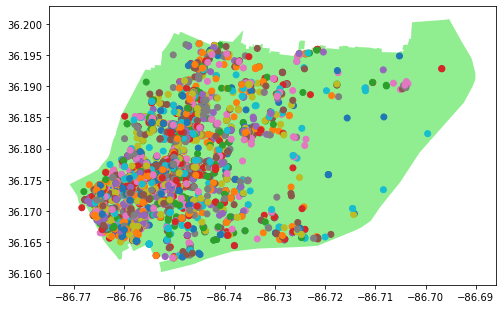

In [29]:
#fig, ax = matplotlib.subplots()
ax = polygon37206.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37206.plot( ax = ax, column = 'sumdID');
plt.show();

In [30]:
polygon37206.geometry.centroid

C:\Users\Joselit\AppData\Local\Temp/ipykernel_13980/4245166938.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37206.geometry.centroid


46    POINT (-86.73098 36.18090)
dtype: geometry

In [31]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37206.geometry.centroid[46]
print(center)

POINT (-86.7309830626016 36.1808969092208)


C:\Users\Joselit\AppData\Local\Temp/ipykernel_13980/3072308459.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37206.geometry.centroid[46]


In [32]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.1808969092208, -86.7309830626016]


In [33]:
#create our map of Nashville Zip Code 37207 and show it
map_37206 = folium.Map(location =  area_center, zoom_start = 12)
map_37206

In [34]:
i = 0
for row_index, row_values in stops_in_37206.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 37
values are:
 
pubTimeStamp                             2019-05-01 00:20:56.140000
tripRecordNum                                               BRD2238
tripRoute         [[36.170966,-86.735252],[36.170966,-86.735252]...
sumdID                                                 PoweredUK4PT
tripDuration                                                    6.0
tripDistance                                             1535.43312
startLatitude                                               36.1709
endLatitude                                                 36.1712
startLongitude                                             -86.7353
endLongitude                                               -86.7351
geometry                                   POINT (-86.7353 36.1709)
index_right                                                      46
zip                                                           37206
po_name                                                   NASHVILLE
Name: 37, dtype: objec

In [35]:
#draw our zip code area: 37206
map_37206 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37206).add_to(map_37206)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37206[['startLatitude', 'startLongitude']].values.tolist()
map_37206.add_child(FastMarkerCluster(locations))



#display our map
map_37206